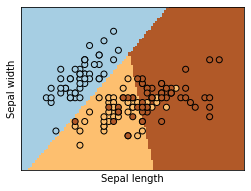

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# 0. Helper function: Sigmoid
def sigmoid(x):
    
    '''
    sigmoid(x) = 1 / (1 + e^(-x))
    '''
    return 1 / (1 + np.exp(-x))# 1. Hypothesis (Logistic Function)
def hypothesis(x, theta):
    
    # h(x) = sigmoid(X.theta)
    z = np.dot(X, theta)
    
    return sigmoid(z)

# 2. Loss Function: Binary Cross Entropy
def binary_cross_entropy(x, y, theta):
    
    m, n = x.shape
    
    # a. Compute the hypothesis
    y_hat = hypothesis(x, theta)
    
    # b. Compute the Binary Cross Entropy
    loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    
    return - np.mean(loss)

# 3. Compute the gradient
def gradient(x, y, theta):
    
    # Compute hypothesis
    y_hat = hypothesis(x, theta)
    
    # Compute gradient
    grad = np.dot( x.T, (y - y_hat))
    
    return - grad / x.shape[0]# 4. Gradient Descent
def gradient_descent(x, y, n_iter = 100, alpha = 0.1):
    
    # a. Randomly initialise theta
    m,n = x.shape
    theta = np.zeros(shape = (n, ))
    
    print(theta.shape)
    # List to store the error
    error = []
    
    # b. Perform the gradient descent
    for i in range(n_iter):
        '''
        y_hat = hypothesis(x, theta)
        print(y_hat, y_hat.shape)
        '''
        
        # b.1. Compute the loss
        loss = binary_cross_entropy(x, y, theta)
        error.append(loss)
        
        # b.2. Copmute Gradient
        grad = gradient(x, y, theta)
        
        # b.3. Perform the update rule
        theta = theta - alpha * grad
    print(theta.shape)    
    return theta, error

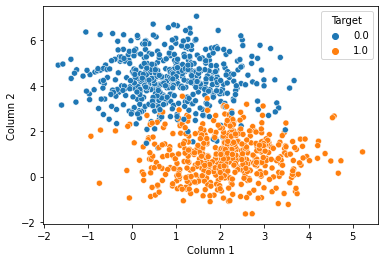

In [4]:
# 1. Create Dataset
X, y = make_blobs(n_samples = 1000, n_features = 2, centers=2, random_state=0)
dataset_array = np.concatenate((X, y.reshape(-1,1)), axis=1)# 2. Create a Dataframe of the array
dataset_df = pd.DataFrame(dataset_array, columns = ['Col 1', 'Col 2', 'Target'])# 3. plot the dataset
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()

(2,)
(2,)


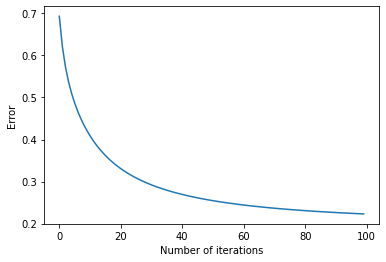

In [5]:
X = dataset_df.drop('Target', axis=1)
y = dataset_df['Target']
theta, error = gradient_descent(X, y, 100)# plot the error
plt.plot(error)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

In [6]:
X.shape

(1000, 2)

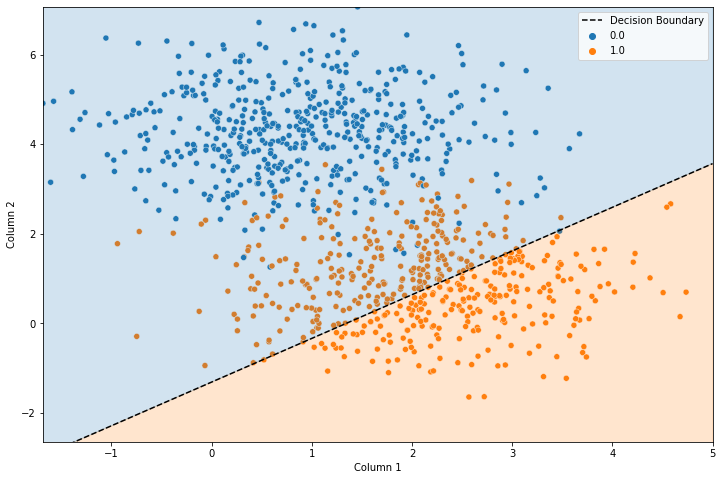

In [7]:
# plot the dataset along with the decision boundary# Create Decision Boundary
x2_max, x2_min = X['Col 2'].max(), X['Col 2'].min()
x1_max, x1_min = X['Col 1'].max(), X['Col 1'].min()
x_vals = np.array([-2, 5])
slope = - theta[1]
intercept = - theta[0]
decision_boundary = slope * x_vals + intercept# Plot the dataset with decision boundary
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x2_max)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

0.0


<ipython-input-18-ba675340dea8>:145: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.sum(y == y_hat) / len(y)


<Figure size 432x288 with 0 Axes>

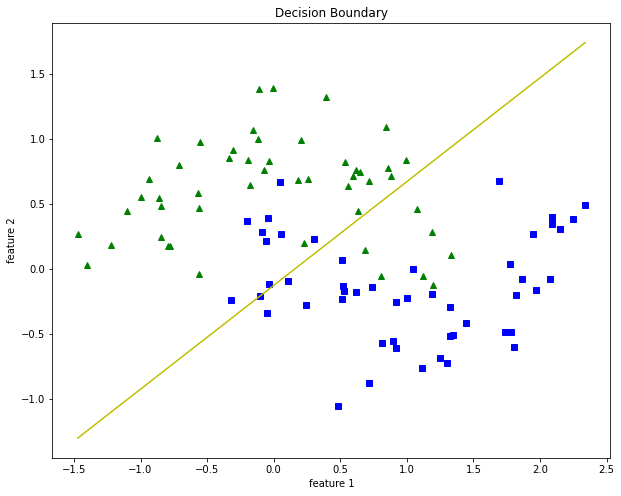

In [18]:
# from sklearn.datasets import make_classification

# X, y = make_classification(n_features=2, n_redundant=0, 
#                            n_informative=2, random_state=1, 
#                            n_clusters_per_class=1)

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
#     plt.xlim([-2, 2])
#     plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')
    
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i < 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

plt.clf()
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)# Plotting Decision Boundary
plot_decision_boundary(X, w, b)
print(accuracy(X, y_hat=predict(X)))

In [13]:
y

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [19]:
predict(X)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])